# Q.4)
Nesterov Accelerated Gradient Descent

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import make_regression
import torch
import torch.nn as nn

In [19]:
#importing data
df = pd.read_excel("E:\ID5030\HW03\Concrete_Data.xls")
print('The shape of given data is:',df.shape)
df

The shape of given data is: (1030, 9)


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [20]:
#obtaining target values
Y = df.iloc[:,8]
Y.head()

0    79.986111
1    61.887366
2    40.269535
3    41.052780
4    44.296075
Name: Concrete compressive strength(MPa, megapascals) , dtype: float64

In [21]:
#obtaining feature values
X=df.iloc[:,:8]
print(f'Number of features in the given dataset is {X.shape[1]}')
X

Number of features in the given dataset is 8


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [22]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size = 0.30,random_state=1)
print(f'The shape of training data is:{x_train.shape}')
#print(y_train.shape)
print(f'The shape of test data is:{x_test.shape}')
#print(y_test.shape)
x_train=np.array(x_train)
y_train = np.array(y_train)
y_train[0]
x_test=np.array(x_test)
y_test = np.array(y_test)

The shape of training data is:(721, 8)
The shape of test data is:(309, 8)


In [23]:
#NORMALISATION OF DATA
def normalise_features(x):
    mu = np.mean(x,axis=0)
    sd = np.std(x,axis=0)
    x_norm=(x-mu)/sd
    return(x_norm,mu,sd)

In [24]:
#Train data normalisation
x_train_norm,meantrain_norm,sdtrain_norm=normalise_features(x_train)
#Test data normalisation
x_test_norm = (x_test-meantrain_norm)/sdtrain_norm

In [25]:
#Finding cost value
def cost_function(x,y,w,b):
    cost = 0.0
    m = x.shape[0]
    for i in range(m):
        ypred=np.dot(x[i],w) + b
        cost  = cost + (y[i]-ypred)**2
    cost = cost/(2*m)
    return cost

In [26]:
#calculating gradient values
def gradient(x,y,w,b):
    m,n = x.shape
    dj_dwj = np.zeros(n)
    dj_dbj = 0
    for j in range(n):
        for i in range(m):
            err = (np.dot(x[i],w)+b)-y[i]
            dj_dwj[j] = dj_dwj[j] + err*x[i,j]
            dj_dbj = dj_dbj + err
    dj_dwj = dj_dwj/m
    dj_dbj = dj_dbj/m
    return dj_dwj,dj_dbj
   

In [27]:
def nesterov_gradient_descent(x,y,w,b,alpha,num_iters,cost_function,beta):
    J=[]
    m,n=x.shape
    vdw=np.zeros(n)
    vdb=0
    for i in range(num_iters):
        vdw = beta*vdw
        vdb = beta*vdb
        dj_dw,dj_db = gradient(x,y,w-vdw,b-vdb)
        vdw = beta*vdw + alpha*dj_dw
        vdb = beta*vdb + alpha*dj_db
        w = w-vdw
        b=b-vdb
        J.append(cost_function(x,y,w,b))
        if i% math.ceil(num_iters / 10) == 0:
            print(f"epoch {i:4d}: mean squared error {2*J[-1]:8.2f}   ")
      
    return w,b,J


Learningrate=0.001
epoch    0: mean squared error  1530.03   
epoch   50: mean squared error   222.06   
epoch  100: mean squared error   167.60   
epoch  150: mean squared error   143.72   
epoch  200: mean squared error   130.29   
epoch  250: mean squared error   122.46   
epoch  300: mean squared error   117.74   
epoch  350: mean squared error   114.77   
epoch  400: mean squared error   112.83   
epoch  450: mean squared error   111.50   
Mean square error of test data is: 125.86691683904448
Feature weights after training:[ 6.86679229  3.05582009 -0.06665286 -4.67636037  4.0782263  -1.93198674
 -2.86651996  6.0702804 ]
The bias term after training: 35.5644473441486
Learningrate=0.01
epoch    0: mean squared error  1352.37   
epoch   50: mean squared error   110.26   
epoch  100: mean squared error   106.94   
epoch  150: mean squared error   105.63   
epoch  200: mean squared error   104.92   
epoch  250: mean squared error   104.47   
epoch  300: mean squared error   104.13   
e

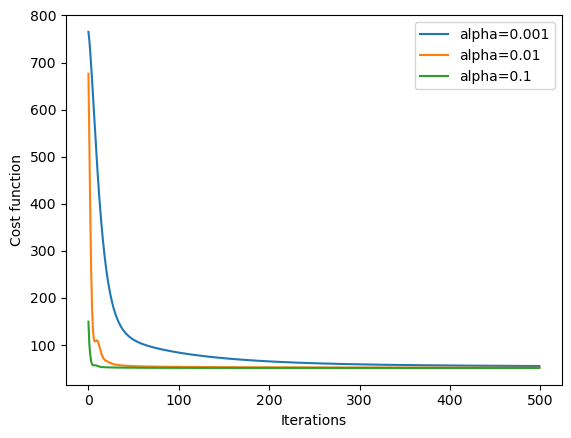

In [35]:
#Nesterov gradient descent for Train data with normalisation
alphanorm=0.001
w_initial=np.zeros(x_train_norm.shape[1])
b_initial=0
beta=0.9
cost_norm_test_full=[]
while alphanorm <=0.1:
    iterationsnorm=500
    print(f'Learningrate={alphanorm}')
    wnorm_final,bnorm_final,Jnorm_final = nesterov_gradient_descent(x_train_norm,y_train,w_initial,b_initial,alphanorm,
                                                          iterationsnorm,cost_function,beta)
    costnorm_test = cost_function(x_test_norm,y_test,wnorm_final,bnorm_final)
    msenorm_test=costnorm_test*2
    cost_norm_test_full.append(costnorm_test)
    print(f'Mean square error of test data is: {msenorm_test}')
    print(f'Feature weights after training:{wnorm_final}')
    print(f'The bias term after training: {bnorm_final}')
    plt.plot(Jnorm_final,label=f'alpha={alphanorm}')
    plt.legend()
    alphanorm=alphanorm*10
plt.xlabel('Iterations')
plt.ylabel('Cost function')
plt.show()

In [36]:
#Nesterov gradient for Test data with normalisation
alphanorm=0.001
for i in cost_norm_test_full:
    print(f'alpha:{alphanorm}  Mean square error for test data:{2*i}')
    alphanorm=alphanorm*10

alpha:0.001  Mean square error for test data:125.86691683904448
alpha:0.01  Mean square error for test data:121.20074804662484
alpha:0.1  Mean square error for test data:120.19304839947598


In [37]:
#Creating tensors
m,n=x_train_norm.shape
X_train_norm = torch.from_numpy(x_train_norm.astype(np.float32))
Y_train = torch.from_numpy(y_train.astype(np.float32))
X_test_norm = torch.from_numpy(x_test_norm.astype(np.float32))
Y_test = torch.from_numpy(y_test.astype(np.float32))
Y_train = Y_train.view(m,1)
Y_test = Y_test.view(Y_test.shape[0],1)
print(Y_train.shape)
print(X_train_norm.shape)
print(Y_test.shape)
print(X_test_norm.shape)

torch.Size([721, 1])
torch.Size([721, 8])
torch.Size([309, 1])
torch.Size([309, 8])


In [38]:
#Creating a Linear Regression Model
m,n=X_train_norm.shape
input_size=n
output_size=1
model=nn.Linear(input_size,output_size)
mse =nn.MSELoss()

Learningrate=1e-05
epochs    0: mean squared error  1539.64   
epochs   50: mean squared error  1515.42   
epochs  100: mean squared error  1487.09   
epochs  150: mean squared error  1459.32   
epochs  200: mean squared error  1432.12   
epochs  250: mean squared error  1405.48   
epochs  300: mean squared error  1379.38   
epochs  350: mean squared error  1353.81   
epochs  400: mean squared error  1328.77   
epochs  450: mean squared error  1304.23   
Mean square error of test data is: 1302.1219482421875
Feature weights after training:[ 0.6434154   0.37015426 -0.01892507 -0.2704517   0.6371377  -0.05688865
 -0.19387753  0.51985335]
The bias term after training: 3.5647284984588623
Learningrate=0.0001
epochs    0: mean squared error  1280.20   
epochs   50: mean squared error  1095.23   
epochs  100: mean squared error   912.10   
epochs  150: mean squared error   763.24   
epochs  200: mean squared error   642.29   
epochs  250: mean squared error   543.96   
epochs  300: mean square

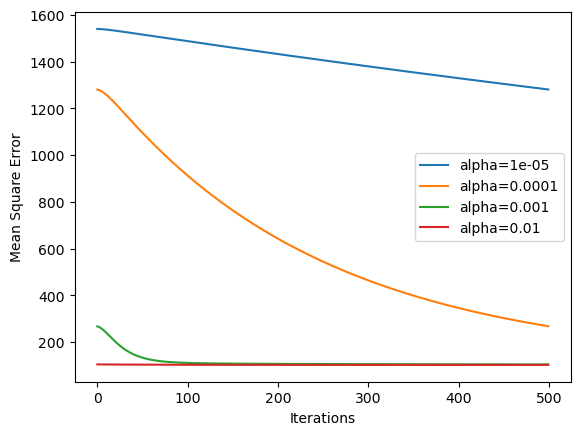

In [39]:
#Nesterov accelarated gradient descent for Train data with normalisation using pytorch
alphanorm=0.00001
Loss_norm_test_full=[]
iterationsnorm=500
input_size=n
output_size=1
while alphanorm <=0.01:
    optimizer = torch.optim.SGD(model.parameters(),lr=alphanorm,momentum=0.9,nesterov = True)
    print(f'Learningrate={alphanorm}')
    J=[]
    for i in range(iterationsnorm): 
        Y_train_predicted = model(X_train_norm)
        loss_norm_train = mse(Y_train,Y_train_predicted)
        loss_norm_train.backward()
        optimizer.step()
        optimizer.zero_grad()
        J.append(loss_norm_train.item())
        if i% math.ceil(iterationsnorm / 10) == 0:
            print(f"epochs {i:4d}: mean squared error {J[-1]:8.2f}   ")
    Y_test_predicted = model(X_test_norm)
    loss_norm_test = mse(Y_test,Y_test_predicted)
    Loss_norm_test_full.append(loss_norm_test)
    w_norm_final,b_norm_final=model.parameters()
    w_norm_final=w_norm_final.detach().numpy().squeeze()
    b_norm_final=b_norm_final.detach().numpy().squeeze()
    print(f'Mean square error of test data is: {loss_norm_test}')
    print(f'Feature weights after training:{w_norm_final}')
    print(f'The bias term after training: {b_norm_final}')
    plt.plot(J,label=f'alpha={alphanorm}')
    plt.legend()
    alphanorm=alphanorm*10
plt.xlabel('Iterations')
plt.ylabel('Mean Square Error')
plt.show()



In [40]:
#Nesterov gradient for Test data with normalisation
alphanorm=0.00001
for i in Loss_norm_test_full:
    print(f'alpha:{alphanorm}  Mean square error for test data:{i}')
    alphanorm=alphanorm*10

alpha:1e-05  Mean square error for test data:1302.1219482421875
alpha:0.0001  Mean square error for test data:263.6310729980469
alpha:0.001  Mean square error for test data:122.70437622070312
alpha:0.01  Mean square error for test data:120.21460723876953


# INFERENCES

Nesterov accelarated gradient descent(NAG) was implemented from scratch for input data with normalisation. The results obtained were similar for implementation from scratch and using Pytorch .It was found that as learning rate increases,covergence becomes faster, reaches an optimum limit,and then starts diverging.The number of iterations required for convergence were less when compared to Batch gradient descent. The learning rate was taken in the range of 0.001 to 0.1 in case of Pytorch and in the range of 0.00001 and 0.01 in case of implementation from scratch. When implemented from scratch,the mean square error was found to be 102.55 for train data and 120.19 for test data(500 epochs). When using Pytorch, the mean square error was found to be 102.55 for train data and 120.21 for test data(500 epochs). The time required was very less in case of Pytorch(almost instantly) compared to the one from scratch. Also,NAG acheived the faster convergence compared to other gradient descent algorithms(500 epochs).

Further,the respective graphs of 'Iterations v/s Mean square error' are plotted for different values of learning rate for detailed analysis.